<a href="https://colab.research.google.com/github/aleksanderprofic/DeepLearning/blob/main/FraudDetection/SelfOrganizingMaps/MiniSom/credit_card_applications__minisom__fraud_detection_with_self_organizing_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [98]:
!pip install MiniSom

### Importing the libraries


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [100]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [101]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [102]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.1)
som.random_weights_init(data=X)
som.train_random(data=X, num_iteration=100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.4924202973472867


##Visualizing the results


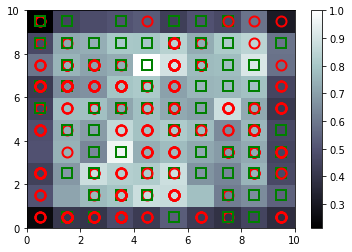

In [103]:
from pylab import bone, pcolor, colorbar, plot

bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    winning_node = som.winner(x)
    plot(winning_node[0] + 0.5, winning_node[1] + 0.5, marker=markers[y[i]], markeredgecolor=colors[y[i]], 
         markerfacecolor='None', markersize=10, markeredgewidth=2)

Potential frauds have coordinates: (3, 3), (4, 7) and (8,7)

## Finding the frauds


In [107]:
mappings = som.win_map(X)
frauds = np.concatenate([mappings[(3,3)], mappings[(4,7)], mappings[(8,7)]], axis=0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [108]:
print("Fraud Customer IDs: ", frauds[:, 0].astype(int).tolist())

Fraud Customer IDs:  [15590434, 15646190, 15799785, 15757434, 15673907]
